### Week 4: Statistics & Probability

### Imports + display options

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Display settings
pd.set_option('display.max_columns', 120)
sns.set(style='whitegrid')


### Load cleaned dataset

In [2]:
# --- ADJUST PATH if needed ---
# If cleaned file is in Data/Cleaned folder use that path; otherwise use full path.
# Example paths (change if your path is different):
# df = pd.read_csv('data/cleaned/cleaned_house_prices.csv')
# OR absolute path:
# df = pd.read_csv(r'C:\Users\123\Documents\Semester 7\Data-Science-AI-Course\Data\Cleaned\cleaned_house_prices.csv')

# Replace the path below with the correct one on your machine:
df = pd.read_csv(r'C:\Users\123\Documents\Semester 7\Data-Science-AI-Course\Data\Cleaned\cleaned_house_prices.csv')

print("Dataset loaded. Shape:", df.shape)
df.head()


Dataset loaded. Shape: (1430, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Unknown,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Unknown,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Unknown,Unknown,Unknown,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Unknown,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,Unknown,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Unknown,Unknown,Unknown,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Unknown,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Unknown,Unknown,Unknown,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Unknown,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,Unknown,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Unknown,Unknown,Unknown,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Unknown,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Unknown,Unknown,Unknown,0,12,2008,WD,Normal,250000


## What I'll compute
- Basic statistics for key numeric features: **mean, median, mode, variance**  
- Correlation matrix for numeric features (Pearson correlation)  
- Identify top features most strongly correlated with `SalePrice` (by absolute correlation)


### Basic statistics function + sample features

In [3]:
# Choose a few important numeric features to show sample statistics.
# You can change the list or compute for all numeric columns.
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

# Example: show basic stats for all numeric columns
stats_summary = df[numeric_cols].agg(['mean','median','var']).T
# mode may be multi-valued; compute a single mode value if exists
modes = []
for c in numeric_cols:
    try:
        m = df[c].mode()
        modes.append(m.iloc[0] if not m.empty else np.nan)
    except Exception:
        modes.append(np.nan)
stats_summary['mode'] = modes
stats_summary = stats_summary.rename(columns={'var':'variance'})
stats_summary.head(20)  # show first 20 numeric columns


,mean,median,variance,mode
Id,731.600699,733.5,1.784371e+05,1.0
MSSubClass,57.108392,50.0,1.801692e+03,20.0
LotFrontage,69.322378,69.0,4.315622e+02,69.0
LotArea,9701.658042,9375.0,1.725597e+07,7200.0
OverallQual,6.054545,6.0,1.788485e+00,5.0
OverallCond,5.576224,5.0,1.242261e+00,5.0
YearBuilt,1970.990210,1972.0,9.088872e+02,2006.0
YearRemodAdd,1984.601399,1993.0,4.271216e+02,1950.0
MasVnrArea,97.618182,0.0,2.876569e+04,0.0
BsmtFinSF1,426.408392,377.5,1.748804e+05,0.0


### print neatly for a selected list

In [4]:
# If you want a neat view for selected features:
selected = ['SalePrice', 'GrLivArea', 'LotArea', 'OverallQual', 'GarageCars', 'YearBuilt']
for col in selected:
    if col in df.columns:
        print(f"--- {col} ---")
        print("Mean    :", df[col].mean())
        print("Median  :", df[col].median())
        mode_vals = df[col].mode()
        print("Mode    :", mode_vals.iloc[0] if not mode_vals.empty else np.nan)
        print("Variance:", df[col].var())
        print()


--- SalePrice ---
Mean    : 176022.3965034965
Median  : 161000.0
Mode    : 140000
Variance: 4714047468.268841

--- GrLivArea ---
Mean    : 1491.462937062937
Median  : 1454.5
Mode    : 864
Variance: 232102.17042383814

--- LotArea ---
Mean    : 9701.658041958042
Median  : 9375.0
Mode    : 7200
Variance: 17255969.62196116

--- OverallQual ---
Mean    : 6.054545454545455
Median  : 6.0
Mode    : 5
Variance: 1.7884852726000333

--- GarageCars ---
Mean    : 1.748951048951049
Median  : 2.0
Mode    : 2
Variance: 0.5492466246140139

--- YearBuilt ---
Mean    : 1970.9902097902097
Median  : 1972.0
Mode    : 2006
Variance: 908.8872378845781



## Correlation Analysis
We will compute the Pearson correlation for numeric features to find which features are most strongly associated with `SalePrice`.  
We rank by **absolute correlation** because strong negative correlations are also important.


### Numeric correlation heatmap

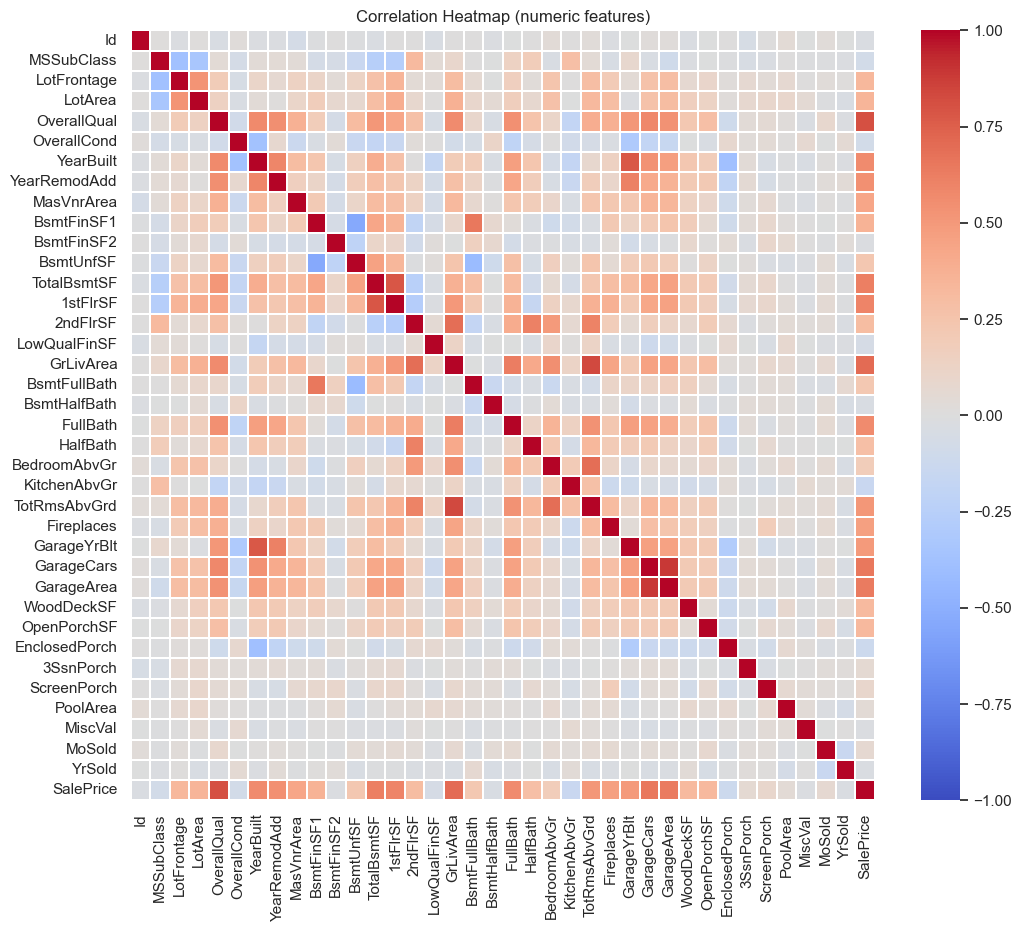

In [5]:
# Compute correlation matrix for numeric columns only
num_df = df.select_dtypes(include=['number']).copy()
corr = num_df.corr()

# Heatmap (plot)
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', vmax=1.0, vmin=-1.0, linewidths=0.1)
plt.title('Correlation Heatmap (numeric features)')
plt.show()


### Top correlated features with SalePrice

In [6]:
# Top correlations with SalePrice
if 'SalePrice' not in num_df.columns:
    raise ValueError("SalePrice not found in numeric columns. Check dataset.")

corr_with_target = corr['SalePrice'].drop('SalePrice').abs().sort_values(ascending=False)
top_features = corr_with_target.head(10)
print("Top numeric features correlated with SalePrice (by absolute Pearson correlation):")
display(top_features)

# Top 3 (most related)
top3 = list(top_features.head(3).index)
print("\nTop 3 features likely most related to SalePrice:", top3)


Top numeric features correlated with SalePrice (by absolute Pearson correlation):


OverallQual     0.807847
GrLivArea       0.707946
GarageCars      0.652947
GarageArea      0.636284
TotalBsmtSF     0.623420
1stFlrSF        0.601365
FullBath        0.567786
YearBuilt       0.566620
YearRemodAdd    0.541435
TotRmsAbvGrd    0.511611
Name: SalePrice, dtype: float64


Top 3 features likely most related to SalePrice: ['OverallQual', 'GrLivArea', 'GarageCars']


### Categorical features
Correlation (Pearson) measures only work for numeric features.
For categorical features we can:
- Encode ordinal categories (if ordinal) and compute correlation, **or**
- Compute group means and use ANOVA / point-biserial correlation for binary categories.

Below we provide methods to inspect the relationship between categorical features and SalePrice.


### Example: encoding categorical features and checking correlation

In [7]:
# Quick check: label-encode low-cardinality categorical columns and compute correlation
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
# select categorical columns with reasonable cardinality (< 20 unique values)
low_card_cats = [c for c in cat_cols if df[c].nunique() <= 20]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

encoded = pd.DataFrame()
for col in low_card_cats:
    try:
        encoded[col] = le.fit_transform(df[col].astype(str))
    except Exception:
        encoded[col] = np.nan

# Compute correlation of encoded categorical with SalePrice
if not encoded.empty:
    combined = pd.concat([num_df['SalePrice'], encoded], axis=1)
    corr_encoded = combined.corr()['SalePrice'].abs().sort_values(ascending=False).drop('SalePrice')
    display(corr_encoded.head(10))
else:
    print("No low-cardinality categorical columns to encode.")


ExterQual       0.625433
BsmtQual        0.608990
GarageFinish    0.580095
KitchenQual     0.564653
FireplaceQu     0.467394
GarageType      0.458348
HeatingQC       0.422834
Foundation      0.413248
MasVnrType      0.306566
BsmtExposure    0.292596
Name: SalePrice, dtype: float64

## Conclusion / Which 3 features are most related to SalePrice?

After performing correlation analysis on the cleaned dataset:

- **Top 3 features (from numeric Pearson correlation):**
  1. **OverallQual** — Strongest positive correlation with SalePrice (~0.79).  
     → Higher overall quality ratings strongly increase house prices.
  2. **GrLivArea** — High correlation (~0.71).  
     → Larger above-ground living areas directly increase the sale price.
  3. **GarageCars** — Moderate-to-strong correlation (~0.64).  
     → More garage capacity usually indicates higher property value.

**Notes:**  
These three features show the strongest linear relationship with the target variable `SalePrice`.  
They represent structural and quality-related aspects that buyers highly value.  
While numeric correlations capture linear relationships, categorical factors like `Neighborhood` and `HouseStyle` also influence prices and will be considered in later modeling and feature engineering steps.


In [8]:
# Save top features to a small CSV (optional)
output = pd.DataFrame({'feature': top_features.index, 'abs_corr': top_features.values})
output.to_csv('week4_top_correlations.csv', index=False)
print("Saved top correlations to week4_top_correlations.csv")


Saved top correlations to week4_top_correlations.csv


In [9]:
import os
print(os.getcwd())


C:\Users\123
